In [1]:
defaultW <- getOption("warn")
options(warn = -1)
library(sp)
library(sf)
library(rgdal)
library(rgeos)
library(maptools)
library(stringr)
library(spdep)
library(spatstat)
library(splancs)
#gpclibPermit()
library(raster)
library(data.table)
require(spatialreg)
options(warn = defaultW)

Linking to GEOS 3.9.0, GDAL 3.2.1, PROJ 7.2.1

rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.1, released 2020/12/29
Path to GDAL shared files: C:/Users/peppu/Documents/R/win-library/4.0/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.1, January 1st, 2021, [PJ_VERSION: 721]
Path to PROJ shared files: C:/Users/peppu/Documents/R/win-library/4.0/rgdal/proj
PROJ CDN enabled: FALSE
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.
Overwritten PROJ_LIB was C:/Users/peppu/Documents/R/win-library/4.0/rgdal/proj

rgeos version: 0.5-5, (SVN revision 640)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Linking to sp version: 1.4-5 
 Polygon checking: TRUE 


Checking rgeos availability: TRUE

Loading required package: spData

To access larger datasets in t

# Inserirsci descrizione dei dati dal Garmin
1 punto ogni 5 minuti

In [2]:
data_garmin = read.csv("garmin_data/dati.csv")
data_garmin$long = as.numeric(data_garmin$long)
data_garmin$lat = as.numeric(data_garmin$lat)
# Change reference system
xy <- data_garmin
coordinates(xy) <- c("long", "lat")
proj4string(xy) <- CRS("+proj=longlat +zone=32 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0")
new_coord = spTransform(xy, CRS("+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0"))
data_garmin$long = as.numeric(new_coord$long)
data_garmin$lat = as.numeric(new_coord$lat)
data_garmin_shp <- SpatialPointsDataFrame(data_garmin[,c('long','lat')], data_garmin,
                proj4string = CRS("+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0"))
head(data_garmin)

,X,lat,long,distance,enhanced_altitude,altitude,enhanced_speed,speed,heart_rate,cadence,act_id,ts
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,52,4851734,680216.2,0.92151,125.8,125.8,26.2296,26.2296,107,68,1,2016-01-10 10:15:00
2,53,4850591,679171.0,2.59930,117.4,117.4,25.1766,25.1766,122,67,1,2016-01-10 10:20:00
3,55,4850151,678484.1,3.89113,115.0,115.0,21.8628,21.8628,119,71,1,2016-01-10 10:30:00
4,56,4850978,677918.1,5.20613,112.6,112.6,24.0372,24.0372,119,73,1,2016-01-10 10:35:00
5,57,4851331,675997.9,7.34763,108.4,108.4,26.4672,26.4672,135,80,1,2016-01-10 10:40:00
6,58,4851229,673759.0,9.58845,108.4,108.4,29.2356,29.2356,140,87,1,2016-01-10 10:45:00


In [3]:
ita_com = readOGR("external_shp/Com01012018_g/Com01012018_g_WGS84.shp")
ita_com$COD_PROV = as.numeric(ita_com$COD_PROV)
ita_com$COD_REG = as.numeric(ita_com$COD_REG)
ita_com$PRO_COM = as.numeric(ita_com$PRO_COM)
head(as.data.frame(ita_com))

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\peppu\Documents\MyPythonProject\geospatial_project\external_shp\Com01012018_g\Com01012018_g_WGS84.shp", layer: "Com01012018_g_WGS84"
with 7960 features
It has 14 fields
Integer64 fields read as strings:  COD_RIP COD_REG COD_PROV COD_CM COD_PCM PRO_COM CC_P_CM 


,SHAPE_LENG,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_PCM,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_P_CM,SHAPE_LE_1,SHAPE_AREA,SHAPE_LEN
,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
0,16192.777,1,1,1,201,201,1004,001004,Albiano d'Ivrea,NA,0,16192.66,11033556,16192.66
1,18083.594,1,1,1,201,201,1005,001005,Alice Superiore,NA,0,18083.46,7508489,18083.46
2,16077.366,1,1,1,201,201,1006,001006,Almese,NA,0,16077.25,17717104,16077.25
3,8909.466,1,1,1,201,201,1007,001007,Alpette,NA,0,8909.40,5321039,8909.40
4,15511.692,1,1,1,201,201,1008,001008,Alpignano,NA,0,15511.57,11982594,15511.57
5,11559.538,1,1,1,201,201,1009,001009,Andezeno,NA,0,11559.45,7495051,11559.45


## Speigare perchè i punti rossi

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"


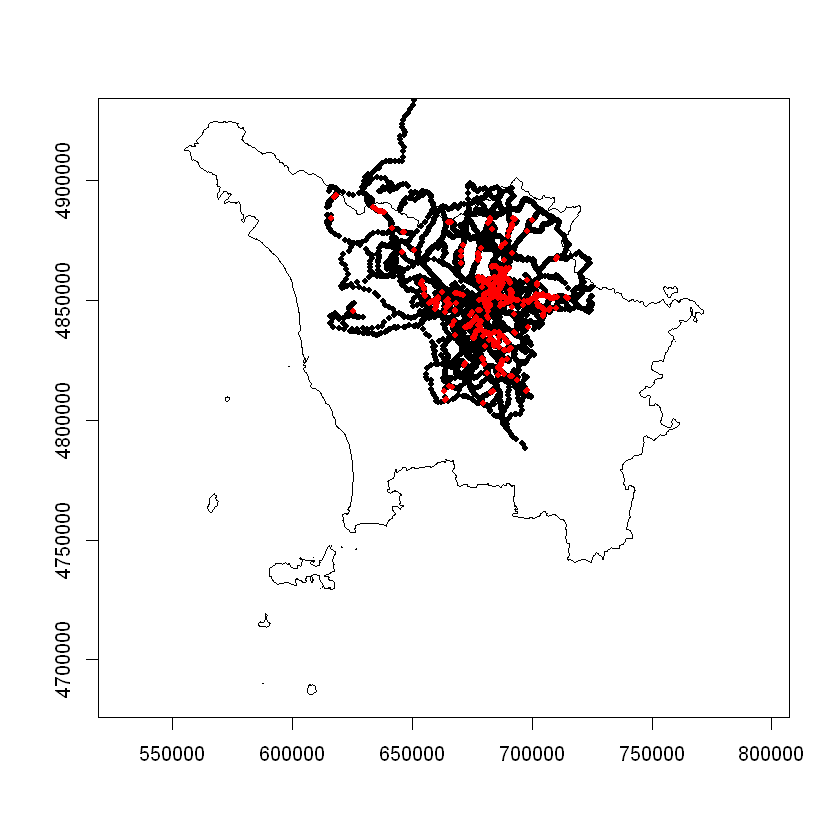

In [4]:
options(jupyter.plot_scale=1)
regione_toscana = subset(ita_com, COD_REG==9) # seleziono solo la toscana
regione_toscana = ita_com[(ita_com$COD_REG==9) & (ita_com$COD_PROV!=53),]
tosc_boundary = unionSpatialPolygons(regione_toscana,IDs = rep(1,nrow(regione_toscana))) # seleziono solo la toscana
plot(tosc_boundary,axes=T) # Plot della toscana
points(data_garmin[,c('long','lat')],pch=20, add=TRUE) # points(data_garmin_shp,pch=20, add=TRUE) -  plot dei punti
points(data_garmin[data_garmin$heart_rate>170,c('long','lat')], pch=20,col = 'red', add=TRUE) # plot dei punti sopra 170 hrm

## Spiega che hai voluto far vedere le direzioni principali di uscita da firenze

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"


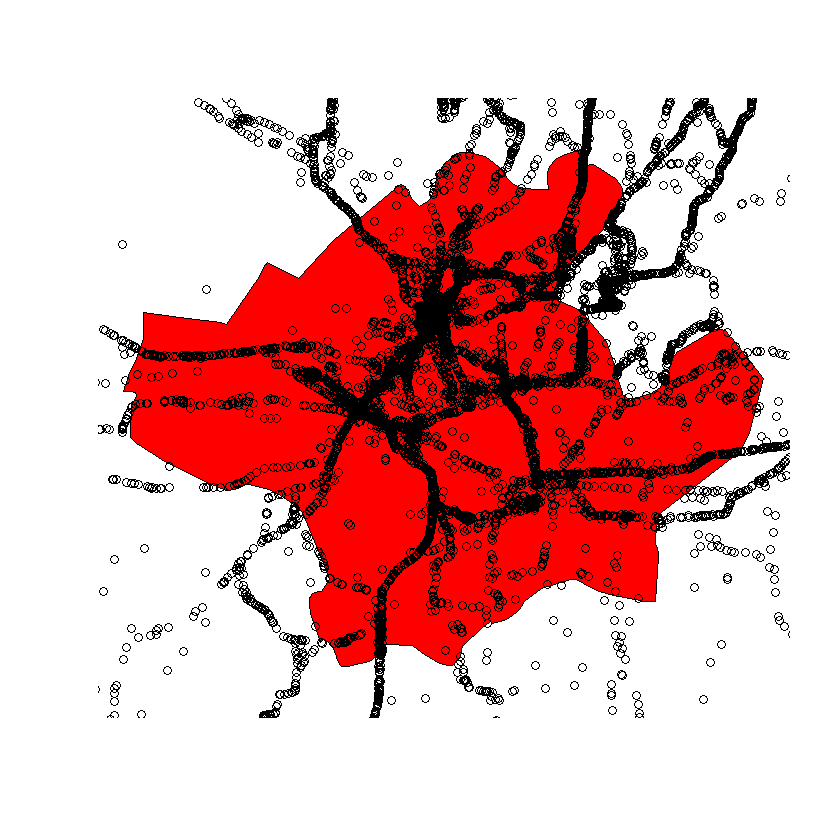

In [5]:
plot(subset(ita_com, COMUNE=='Firenze'),c='red')
points(data_garmin_shp, add=TRUE)

## Spiega che sotto volevo vedere la distribuzione di dove vai maggiormente e dove ti alleni maggiormente

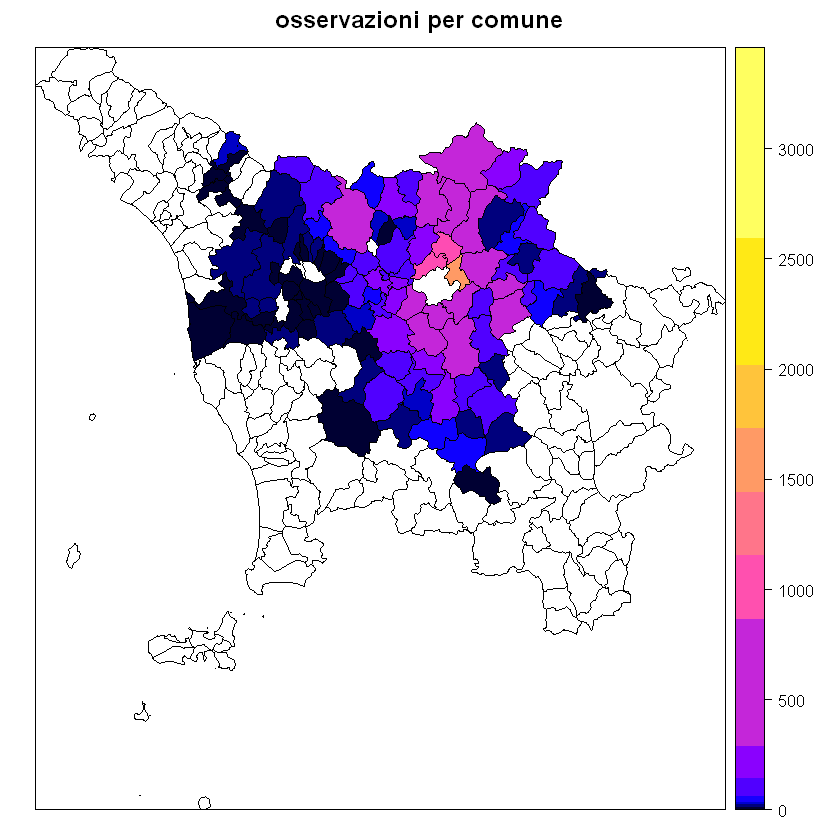

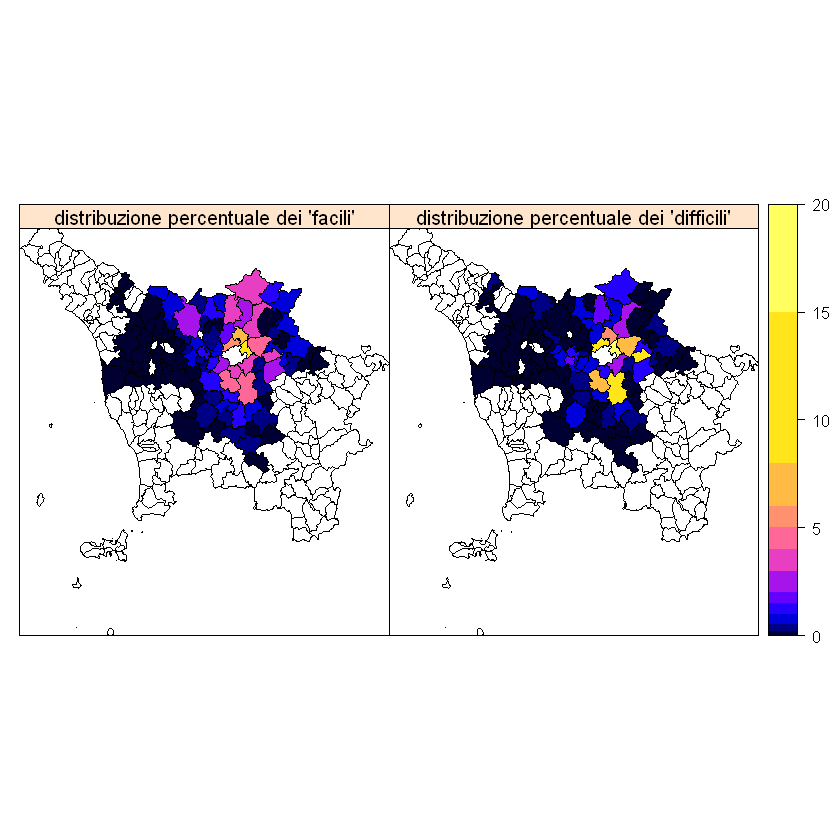

In [10]:
agg_over = table(over_170$PRO_COM,over_170$over_170)
agg_over = as.data.frame(cbind(as.numeric(rownames(agg_over)),agg_over))
names(agg_over) <- c("PRO_COM","facile","difficile")

agg_over$perc_facile <- agg_over$facile/sum(agg_over$facile) * 100
agg_over$perc_difficile <- agg_over$difficile/sum(agg_over$difficile) * 100

uniti <- merge(regione_toscana,agg_over,by="PRO_COM")
uniti$osservazioni <- uniti$difficile + uniti$facile

spplot(uniti,"osservazioni",
       at=c(0,12,2*12,3*12,5*12,12*12,24*12,72*12,96*12,120*12,144*12,168*12,216*12,144*2*12),
       main = "osservazioni per comune")

spplot(uniti,c("perc_facile","perc_difficile"),
       at=c(0,0.2,0.5,1,1.5,2,3,4,5,6,8,15,20),
      names.attr=c("distribuzione percentuale dei \'facili'","distribuzione percentuale dei \'difficili'"))

## stima di intensità

In [12]:
facili = subset(data_garmin, heart_rate<170)
facili_ppp <- ppp(facili$long,facili$lat, window = as.owin(tosc_boundary))
summary(facili_ppp) # già vedi l'intensità media

difficili = subset(data_garmin, heart_rate>170)
difficili_ppp <- ppp(difficili$long,difficili$lat, window = as.owin(tosc_boundary))
summary(difficili_ppp) # già vedi l'intensità media

Warning message:
"358 points were rejected as lying outside the specified window"


Planar point pattern:  19875 points
Average intensity 1.075476e-06 points per square unit

Coordinates are given to 1 decimal place
i.e. rounded to the nearest multiple of 0.1 units

Window: polygonal boundary
28 separate polygons (1 hole)
                  vertices         area relative.area
polygon 1               45  1.18257e+07      6.40e-04
polygon 2               12  4.75229e+03      2.57e-07
polygon 3               17  1.83118e+04      9.91e-07
polygon 4               71  1.04789e+07      5.67e-04
polygon 5               13  3.42672e+03      1.85e-07
polygon 6               15  5.45094e+03      2.95e-07
polygon 7               12  1.70147e+04      9.21e-07
polygon 8                8  5.07992e+02      2.75e-08
polygon 9               17  1.93844e+04      1.05e-06
polygon 10               6  1.31773e+03      7.13e-08
polygon 11              11  6.76488e+02      3.66e-08
polygon 12              13  1.83697e+03      9.94e-08
polygon 13               6  9.43111e+02      5.10e-08
poly

Planar point pattern:  782 points
Average intensity 4.231558e-08 points per square unit

Coordinates are given to 1 decimal place
i.e. rounded to the nearest multiple of 0.1 units

Window: polygonal boundary
28 separate polygons (1 hole)
                  vertices         area relative.area
polygon 1               45  1.18257e+07      6.40e-04
polygon 2               12  4.75229e+03      2.57e-07
polygon 3               17  1.83118e+04      9.91e-07
polygon 4               71  1.04789e+07      5.67e-04
polygon 5               13  3.42672e+03      1.85e-07
polygon 6               15  5.45094e+03      2.95e-07
polygon 7               12  1.70147e+04      9.21e-07
polygon 8                8  5.07992e+02      2.75e-08
polygon 9               17  1.93844e+04      1.05e-06
polygon 10               6  1.31773e+03      7.13e-08
polygon 11              11  6.76488e+02      3.66e-08
polygon 12              13  1.83697e+03      9.94e-08
polygon 13               6  9.43111e+02      5.10e-08
polygo

In [16]:
sum(duplicated(facili_ppp)) # non ci sono duplicati
sum(duplicated(difficili_ppp)) # non ci sono duplicati

[1] 0

[1] 0

In [26]:
# possiamo definire prima la griglia su cui calcolare la kernel density, oppure 
griglia <- as.mask(as.owin(tosc_boundary), dimyx = 1500) #500 pixel per lato
#kernel density (kernel gaussiano, per vari valori di sigma (che determina la bandwidth))
difficili_k1000 <- density(difficili_ppp, sigma = 2000, xy=griglia)
plot(difficili_k1000)

real-valued pixel image
1500 x 1500 pixel array (ny, nx)
enclosing rectangle: [554720, 771620] x [4685500, 4924800] units

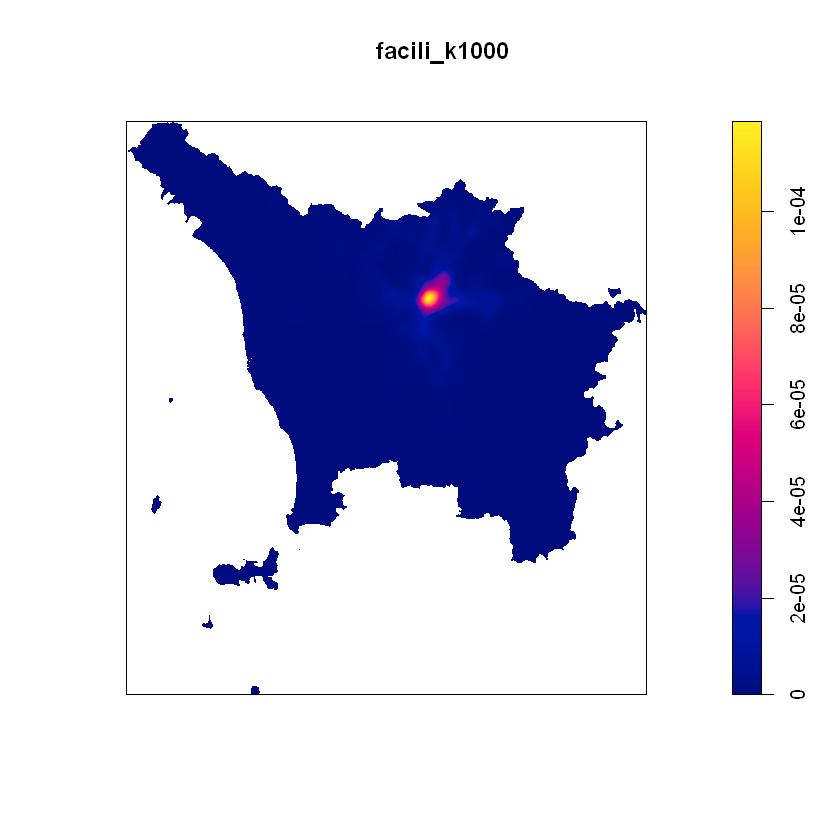

In [28]:
facili_k1000 <- density(facili_ppp, sigma = 2000, xy=griglia) 
plot(facili_k1000)

## Spiega cosa volevi far vedere sotto

In [ ]:
# Numero di casi per ogni comune (non si capisce, mettilo in fondo)
over_170 = over(data_garmin_shp, ita_com)
over_170 = cbind(data_garmin_shp$heart_rate>170,over_170)
over_170 = over_170[over_170$PRO_COM!=48017,] # Firenze is excluded because it is a sort of outlier
names(over_170)[1] <- "over_170"

# numero di casi e controlli per comune
barplot(table(over_170$COMUNE),main='Numero di "over_170" per comune')

# Backup

In [ ]:
conta[conta$PRO_COM==51023,]

In [ ]:
ita_com

In [ ]:
project(data_garmin[1,c('long','lat')], "+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0") 

In [ ]:
filter(ita_com, COMUNE %in% c('Firenze'))

In [ ]:
project(cbind(c(11.24015, 43.79671), c(41.07388, 14.84971)) , "+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0") 


In [ ]:
# writeOGR(points_shp, "output_pp/garmin_data.shp", "", driver="ESRI Shapefile")
project(cbind(c(14.84971, 41.07388), c(41.07388, 14.84971)) , "+proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0") 
# cbind(c(1, 1), c(10, 50)) 

In [ ]:
xy <- data_garmin
coordinates(xy) <- c("long", "lat")
proj4string(xy) <- CRS("+proj=longlat +zone=32 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0")
new_coord = spTransform(xy, CRS("+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0"))

In [ ]:
plot(subset(ita_com, COMUNE=='Firenze'),c='red')
points(data_garmin_shp, add=TRUE)


In [ ]:
a$long

In [ ]:
as.data.frame(a)

In [ ]:
as.data.frame(subset(ita_com, COMUNE=='Firenze'))

In [ ]:
FI_PO_com = readOGR("C:/Users/peppu/Google Drive/Peppus/Università/Master/Lessons/Block2/GeoSpatialNetwork/GeoSpatial/R/shapes/FI_PO.shp")
as.data.frame(FI_PO_com)

In [ ]:
write.csv(as.data.frame(conta),'trash/aaaa.csv')

In [ ]:
unique(ita_com$PRO_COM!=48017)

In [ ]:
plot(altimetria)

In [ ]:
terrain

In [ ]:
a = readGDAL("external_shp/altitude100m.tif")
summary(a)
# summary(altimetria)
image(a, axes = T,col=terrain.colors(10))
plot(altimetria,col=terrain.colors(10))

In [ ]:
altimetria = readGDAL("external_shp/altitude100m.tif")
altimetria = spTransform(altimetria, CRS("+proj=utm +zone=32 +datum=WGS84 +k=0.9996 +x_0=1500000 +y_0=0 +ellps=intl"))
summary(altimetria)

In [ ]:
ppp